<a href="https://colab.research.google.com/github/Gavriel55555/translator/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

#from torchsummary import summary

import sys
sys.path.insert(0, '../helpers')




#from visual_helpers import *

# model interpretability
import seaborn as sns
import itertools
import xarray as xr

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import io
from google.colab import files
uploaded = files.upload()
data = xr.open_dataset(io.BytesIO(uploaded['date_2023-04-15_time_12_00_00.nc']))

Saving date_2023-04-15_time_12_00_00.nc to date_2023-04-15_time_12_00_00.nc


In [ ]:
print(data)

<xarray.Dataset>
Dimensions:    (longitude: 900, latitude: 451, level: 3, time: 3)
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * level      (level) int32 115 125 135
  * time       (time) datetime64[ns] 2023-04-15T12:00:00 ... 2023-04-16T12:00:00
Data variables:
    aermr05    (time, level, latitude, longitude) float32 ...
    aermr06    (time, level, latitude, longitude) float32 ...
    aermr04    (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-04-18 12:39:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [ ]:
print(data.attrs)

{'Conventions': 'CF-1.6', 'history': '2023-04-18 12:39:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/tmp/370a14d4-7c2a-4adb-a477-428c8c8b6ad0-adaptor.mars_constrained.internal-1681821550.2127125-5935-23-tmp.nc /cache/tmp/370a14d4-7c2a-4adb-a477-428c8c8b6ad0-adaptor.mars_constrained.internal-1681821548.4230354-5935-16-tmp.grib'}


In [ ]:
print(data.data_vars)

Data variables:
    aermr05  (time, level, latitude, longitude) float32 ...
    aermr06  (time, level, latitude, longitude) float32 ...
    aermr04  (time, level, latitude, longitude) float32 ...


In [ ]:
data.variables

Frozen({'longitude': <xarray.IndexVariable 'longitude' (longitude: 900)>
array([  0. ,   0.4,   0.8, ..., 358.8, 359.2, 359.6], dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 451)>
array([ 90. ,  89.6,  89.2, ..., -89.2, -89.6, -90. ], dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude, 'level': <xarray.IndexVariable 'level' (level: 3)>
array([115, 125, 135], dtype=int32)
Attributes:
    long_name:  model_level_number, 'time': <xarray.IndexVariable 'time' (time: 3)>
array(['2023-04-15T12:00:00.000000000', '2023-04-16T00:00:00.000000000',
       '2023-04-16T12:00:00.000000000'], dtype='datetime64[ns]')
Attributes:
    long_name:  time, 'aermr05': <xarray.Variable (time: 3, level: 3, latitude: 451, longitude: 900)>
array([[[[ 9.691803e-12, ...,  9.691803e-12],
         ...,
         [-1.421085e-14, ..., -1.421085e-14]],

        ...,

        [[ 4.831691e-12, ...,  4

In [ ]:
print(data["aermr05"])

<xarray.DataArray 'aermr05' (time: 3, level: 3, latitude: 451, longitude: 900)>
[3653100 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * level      (level) int32 115 125 135
  * time       (time) datetime64[ns] 2023-04-15T12:00:00 ... 2023-04-16T12:00:00
Attributes:
    units:      kg kg**-1
    long_name:  Dust Aerosol (0.55 - 0.9 um) Mixing Ratio


In [ ]:
df=data.to_dataframe()

In [ ]:
unique_long_index=np.unique([x[0] for x in df.index])

In [ ]:
W=len(np.unique([x[0] for x in df.index]))
H=len(np.unique([x[1] for x in df.index]))
N=len(np.unique([x[2] for x in df.index]))
L=len(np.unique([x[3] for x in df.index]))

In [ ]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
from einops import rearrange

In [ ]:
df1=df.to_numpy()

In [ ]:
df1.shape

(3653100, 3)

In [ ]:
df2=rearrange(df1,"(W H N L) C -> L C N H W ",W=W, H=H ,N=N,L=L )

In [ ]:
df2.shape

(3, 3, 3, 451, 900)

In [ ]:
df2[0,0,0]

array([[ 9.6918029e-12,  9.6918029e-12,  9.6918029e-12, ...,
         9.6918029e-12,  9.6918029e-12,  9.6918029e-12],
       [ 9.6918029e-12,  9.6918029e-12,  9.6918029e-12, ...,
         9.6918029e-12,  9.6918029e-12,  9.6918029e-12],
       [ 9.6918029e-12,  9.6918029e-12,  9.6918029e-12, ...,
         9.6918029e-12,  9.6918029e-12,  9.6918029e-12],
       ...,
       [-1.4210855e-14, -1.4210855e-14, -1.4210855e-14, ...,
        -1.4210855e-14, -1.4210855e-14, -1.4210855e-14],
       [-1.4210855e-14, -1.4210855e-14, -1.4210855e-14, ...,
        -1.4210855e-14, -1.4210855e-14, -1.4210855e-14],
       [-1.4210855e-14, -1.4210855e-14, -1.4210855e-14, ...,
        -1.4210855e-14, -1.4210855e-14, -1.4210855e-14]], dtype=float32)

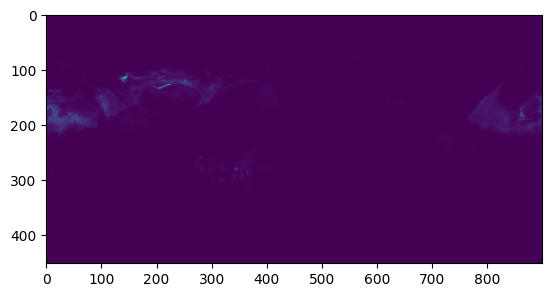

In [ ]:
plt.imshow(df2[0,2,2])